## CIFAR-100 - Representations from Vision Transformer

In [1]:
from fenec import FeNeC
from mlp_classifier import MLPClassifier
from feloc import FeLoC
from kmeans import KMeans
import utils
import metrics

import sklearn.neural_network

In [2]:
device = utils.get_device()

Device used: cuda


## Sample run

Using FeNeC:

In [10]:
# Define the Classifier metric and the KMeans metric
metric = metrics.MahalanobisMetric(shrinkage=1, gamma_1=6.1, gamma_2=8.1, normalization=True)
metric_kmeans = metrics.EuclideanMetric()

# Initialize KMeans and FeNeC
kmeans = KMeans(n_clusters=26, metric=metric_kmeans)
clf = FeNeC(n_neighbors=2,
            metric=metric,
            data_normalization=False,
            tukey_lambda=1,
            kmeans=kmeans,
            device=device)

# Run the classifier on the dataset
_ = utils.train(clf=clf, folder_name='../data/dataset1', n_tasks=10, only_last=False, verbose=1)

|   Task |   Class num | Precision   | Recall   |   FScore |   Accuracy | % of all Answers   |
|-------:|------------:|:------------|:---------|---------:|-----------:|:-------------------|
|      0 |          10 | 98.60%      | 98.60%   |     0.99 |       0.99 | 100.00%            |
task 0: (time: 1.7907s)
FeCAM accuracy: 97.9000; My accuracy: 98.6000
|   Task |   Class num | Precision   | Recall   |   FScore |   Accuracy | % of all Answers   |
|-------:|------------:|:------------|:---------|---------:|-----------:|:-------------------|
|      0 |          10 | 95.89%      | 96.30%   |     0.96 |       0.96 | 50.20%             |
|      1 |          10 | 95.12%      | 94.60%   |     0.95 |       0.95 | 49.80%             |
task 1: (time: 1.9906s)
FeCAM accuracy: 94.8500; My accuracy: 95.4500
|   Task |   Class num | Precision   | Recall   |   FScore |   Accuracy | % of all Answers   |
|-------:|------------:|:------------|:---------|---------:|-----------:|:-------------------|
|    

Using MLPClassifier (obsolete):

In [11]:
# Define the Classifier metric and the KMeans metric
metric = metrics.MahalanobisMetric(shrinkage=1, gamma_1=1, gamma_2=0.5, normalization=True)
metric_kmeans = metrics.EuclideanMetric()

# Define the model to use in MLPClassifier
model = sklearn.neural_network.MLPClassifier(solver='adam',
                                             hidden_layer_sizes=(100,),
                                             learning_rate_init=0.01,
                                             max_iter=1000)

# Initialize KMeans and the MLPClassifier
kmeans = KMeans(n_clusters=20, metric=metric_kmeans)
clf = MLPClassifier(model=model,
                    n_store=50, 
                    selection_method='random', 
                    metric=metric, 
                    data_normalization=False,
                    tukey_lambda=1, 
                    kmeans=kmeans, 
                    device=device)

# Run the classifier on the dataset
_ = utils.train(clf=clf, folder_name='../data/dataset1', n_tasks=10, only_last=False, verbose=1)

|   Task |   Class num | Precision   | Recall   |   FScore |   Accuracy | % of all Answers   |
|-------:|------------:|:------------|:---------|---------:|-----------:|:-------------------|
|      0 |          10 | 98.31%      | 98.30%   |     0.98 |       0.98 | 100.00%            |
task 0: (time: 1.6044s)
FeCAM accuracy: 97.9000; My accuracy: 98.3000
|   Task |   Class num | Precision   | Recall   |   FScore |   Accuracy | % of all Answers   |
|-------:|------------:|:------------|:---------|---------:|-----------:|:-------------------|
|      0 |          10 | 95.94%      | 93.00%   |     0.94 |       0.93 | 48.50%             |
|      1 |          10 | 93.00%      | 94.40%   |     0.93 |       0.94 | 51.50%             |
task 1: (time: 2.6301s)
FeCAM accuracy: 94.8500; My accuracy: 93.7000
|   Task |   Class num | Precision   | Recall   |   FScore |   Accuracy | % of all Answers   |
|-------:|------------:|:------------|:---------|---------:|-----------:|:-------------------|
|    

Using FeLoC:

In [12]:
# Define the Classifier metric and the KMeans metric
metric = metrics.MahalanobisMetric(shrinkage=1, gamma_1=9, gamma_2=12, normalization=True)
metric_kmeans = metrics.EuclideanMetric()

# Initialize KMeans and FeLoC
kmeans = KMeans(n_clusters=50, metric=metric_kmeans)
clf = FeLoC(metric=metric,
            kmeans=kmeans,
            data_normalization=False,
            device=device,
            tukey_lambda=1,
            batch_size=8,
            optimizer="SGD",
            n_points=3,
            mode=0,
            num_epochs=300,
            lr=0.003,
            early_stop_patience=10,
            reg_type=None,
            reg_lambda=None,
            normalization_type=None,
            tanh_x=None,
            centroids_new_old_ratio=None,
            train_only_on_first_task=True,
            dataloader_batch_size=64)

# Run the classifier on the dataset
_ = utils.train(clf=clf, folder_name='../data/dataset1', n_tasks=10, only_last=False, verbose=1)

Dataloader created
Validation Accuracy after Epoch [1/300]: 99.80%, Loss = 0.4479,
Validation Accuracy after Epoch [11/300]: 99.80%, Loss = 0.1088,
Validation Accuracy after Epoch [21/300]: 99.80%, Loss = 0.0712,
Validation Accuracy after Epoch [31/300]: 99.80%, Loss = 0.0557,
Validation Accuracy after Epoch [41/300]: 99.80%, Loss = 0.0470,
Validation Accuracy after Epoch [51/300]: 99.80%, Loss = 0.0412,
Validation Accuracy after Epoch [61/300]: 99.80%, Loss = 0.0372,
Validation Accuracy after Epoch [71/300]: 99.80%, Loss = 0.0341,
Validation Accuracy after Epoch [81/300]: 99.80%, Loss = 0.0317,
Validation Accuracy after Epoch [91/300]: 99.80%, Loss = 0.0297,
Validation Accuracy after Epoch [101/300]: 99.80%, Loss = 0.0281,
Validation Accuracy after Epoch [111/300]: 99.80%, Loss = 0.0267,
Validation Accuracy after Epoch [121/300]: 99.80%, Loss = 0.0255,
Validation Accuracy after Epoch [131/300]: 99.80%, Loss = 0.0245,
Validation Accuracy after Epoch [141/300]: 99.80%, Loss = 0.0236,
Va

Using FeLoC (mode 1) (obsolete):

In [13]:
# Define the Classifier metric and the KMeans metric
metric = metrics.MahalanobisMetric(shrinkage=1, gamma_1=1, gamma_2=1, normalization=True)
metric_kmeans = metrics.EuclideanMetric()


# Initialize KMeans and the MLPClassifier
kmeans = KMeans(n_clusters=75, metric=metric_kmeans)
clf = FeLoC(metric=metric,
            kmeans=kmeans,
            data_normalization=False,
            device=device,
            batch_size=8,
            tukey_lambda=1,
            optimizer="SGD",
            n_points=5,
            mode=1,
            num_epochs=100,
            lr=1e-3,
            early_stop_patience=10,
            reg_type=None,
            reg_lambda=None,
            normalization_type=None,
            tanh_x=1,
            centroids_new_old_ratio=0.1,
            train_only_on_first_task=False,
            dataloader_batch_size=64)

# Run the classifier on the dataset
_ = utils.train(clf=clf, folder_name='../data/dataset1', n_tasks=10, only_last=False, verbose=1)

Dataloader created
Validation Accuracy after Epoch [1/100]: 34.00%, Loss = 2.0394,
Validation Accuracy after Epoch [11/100]: 59.00%, Loss = 1.3222,
Validation Accuracy after Epoch [21/100]: 59.80%, Loss = 1.2043,
Validation Accuracy after Epoch [31/100]: 59.80%, Loss = 1.1588,
Validation Accuracy after Epoch [41/100]: 60.00%, Loss = 1.1313,
Validation Accuracy after Epoch [51/100]: 66.60%, Loss = 1.1093,
Validation Accuracy after Epoch [61/100]: 68.00%, Loss = 1.0897,
Validation Accuracy after Epoch [71/100]: 68.00%, Loss = 1.0714,
Validation Accuracy after Epoch [81/100]: 68.40%, Loss = 1.0541,
Validation Accuracy after Epoch [91/100]: 68.80%, Loss = 1.0377,
|   Task |   Class num | Precision   | Recall   |   FScore |   Accuracy | % of all Answers   |
|-------:|------------:|:------------|:---------|---------:|-----------:|:-------------------|
|      0 |          10 | 55.35%      | 67.50%   |     0.59 |       0.68 | 100.00%            |
task 0: (time: 38.0979s)
FeCAM accuracy: 97.900

## Grid search results

In [3]:
study_name = "GridSearch_FeLoC_CIFAR_ViT"

plot accuracies against hyperparameters' values 

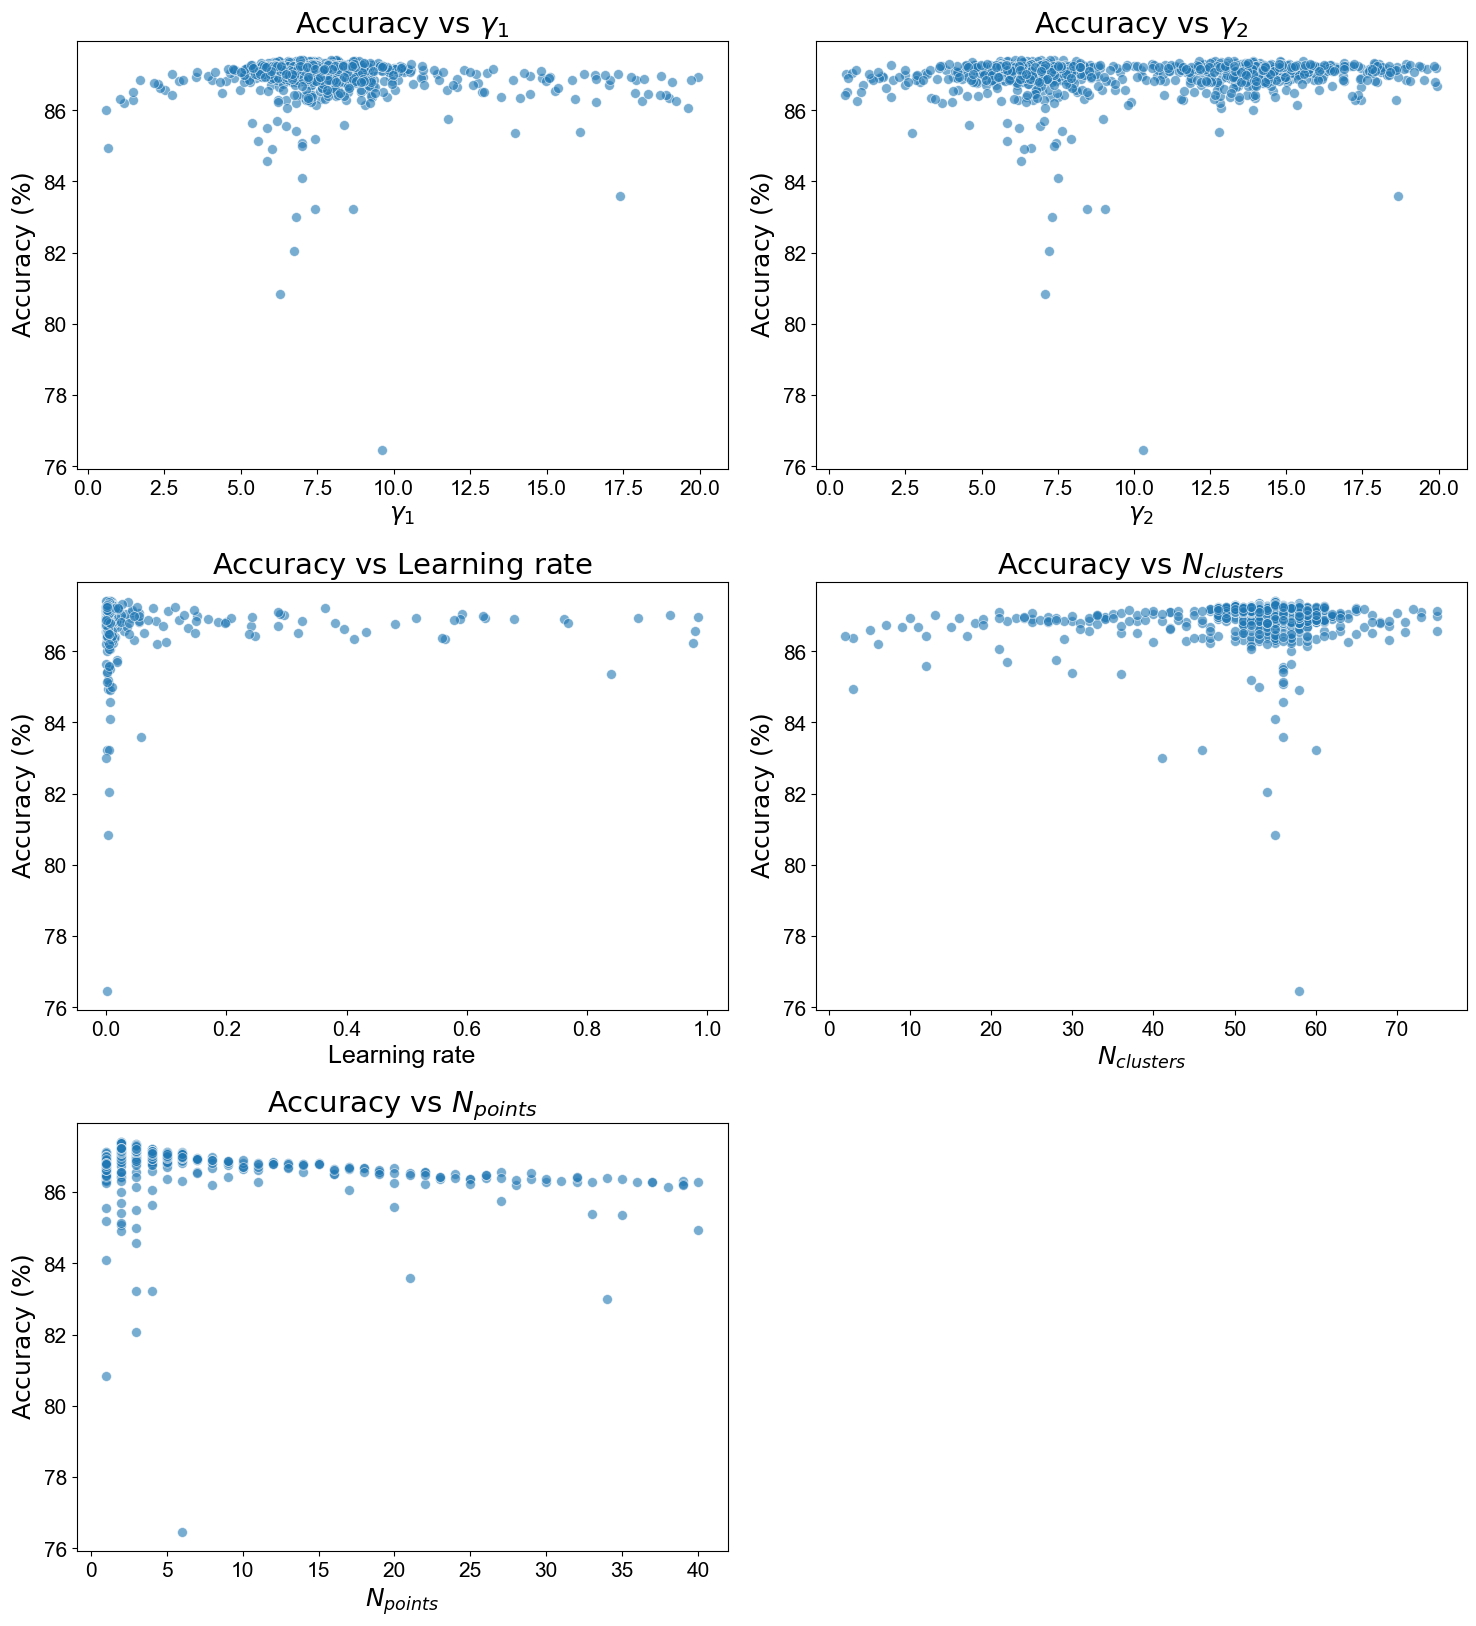

In [15]:
utils.plot_params_accuracy(study_name=study_name, path='../results/final/', ylim=True, only_later=None, columns=2)

plot a specific hyperparameter

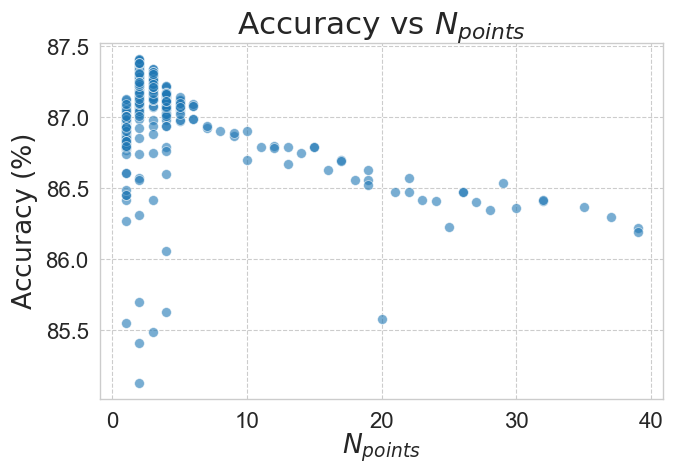

In [18]:
# Load data and extract names
df = utils.load_from_csv(study_name=study_name, path='../results/final/')

name = "FeLoC_ViT_CIFAR"
param_name = "n_points"

accuracies = df['value'].values
param_vals = df[f'params_{param_name}'].values
path_to_pdf = f"plots/{name}_acc_vs_{param_name}.pdf"
title = utils.format_param_accuracy_title(param_name)

utils.plot_param_accuracy(param_name=param_name, param_vals=param_vals, accuracies=accuracies, ylim=True, 
                               ylim_set=85, xlim_set=None, only_later=0.5, fig_size=(7, 5), font_scale=1.6,
                               title_pad=7, label_pad=0, title=title, path_to_pdf=path_to_pdf)

Colorful plots

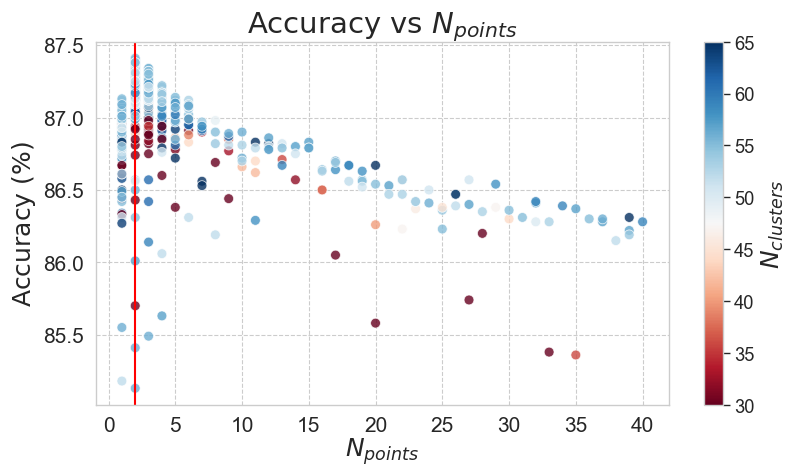

In [6]:
name = "FeLoC_ViT_CIFAR"
x_name, y_name, hue_name = "n_points", "accuracy", "n_clusters"

df = utils.load_from_csv(study_name=study_name, path='../results/final/')
path_to_pdf = f"plots/{name}_{y_name}_vs_{x_name}.pdf"

utils.plot_acc_param_hue(df, x_name, y_name, hue_name, 
                         ylim=True, ylim_set=85.1, xlim_set=None, only_later=None,
                         s_plot=50, alpha_plot=0.8, line_style=1,
                         palette='RdBu', show_bar=True, bar_lim=(30, 65),
                         title_pad=7, label_pad=0, font_scale=1.5,  
                         fig_size=(7, 5), path_to_pdf=path_to_pdf)

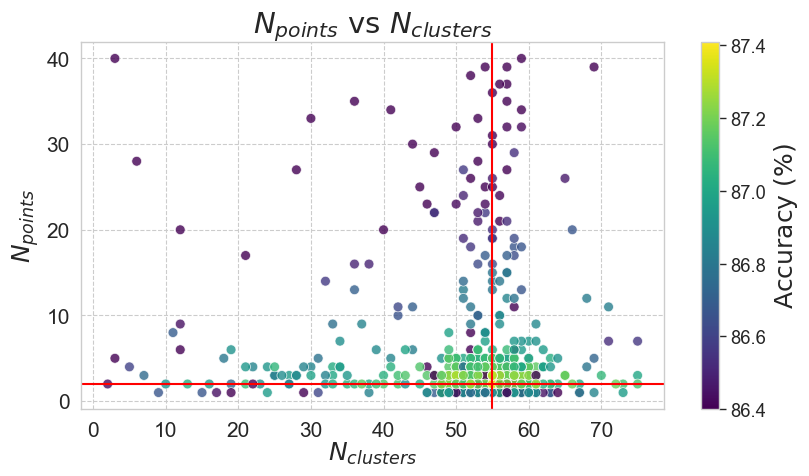

In [5]:
name = "FeLoC_ViT_CIFAR"
x_name, y_name, hue_name = "n_clusters", "n_points", "accuracy"

df = utils.load_from_csv(study_name=study_name, path='../results/final/')
path_to_pdf = f"plots/{name}_{y_name}_vs_{x_name}.pdf"

utils.plot_acc_param_hue(df, x_name, y_name, hue_name, 
                         ylim=False, ylim_set=None, xlim_set=None, only_later=None,
                         s_plot=50, alpha_plot=0.8, line_style=2,
                         palette='viridis', show_bar=True, bar_lim=(86.4, None),
                         title_pad=7, label_pad=0, font_scale=1.5,
                         fig_size=(7, 5), path_to_pdf=path_to_pdf)